In [17]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

In [40]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

In [32]:
data_base = '../data_prods/'

outpath = '../plots/plots_L3N256/'

snap_no = 7

In [68]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l
def calculate_fourier_conversion(Boxsize):
    '''
    Takes the Boxsize in kpc and produces the conversion factors
    from Fourier units to physical units. For use with genPK output.
    '''
    Boxsize = Boxsize / 1000 # convert to Mpc

    k_conv = 2*np.pi / Boxsize
    p_conv = (Boxsize / (2 * np.pi))**3
    
    return k_conv, p_conv

def get_genPK_data(fpath, boxsize):
    
    k_conv, p_conv = calculate_fourier_conversion(boxsize)

    genPK = np.loadtxt(fpath)
    
    bins = genPK[:, 0]
    pk = genPK[:, 1]
    
    dk = pk * (2 * np.pi)**3 * (4 * np.pi) * bins**3
    
    bins = genPK[:, 0] * k_conv
    
    pk = genPK[:, 1] * p_conv
    
    return bins, pk, dk

def load_ps_data(run_name, snapshot_i, dm_type='DM'):
    run_info_path = os.path.join(data_base, run_name, 'run_info.json')
    with open(run_info_path) as f:
        run_info = json.load(f)
    boxsize = run_info['BoxSize']
    npart = run_info['NPart']

    pk_file = os.path.join(data_base, run_name, f'PK-{dm_type}-snap_00{snapshot_i}.hdf5') 

    bins, pk, dk = get_genPK_data(pk_file, boxsize)

    k_ny = npart * np.pi / (boxsize / 1000) # k_ny in Mpc^-1

    return bins, pk, dk, k_ny
    

1.38e+05 0.4040948275862069
1.17e+05 0.4040948275862069
1.38e+05 0.4040948275862069
1.17e+05 0.4040948275862069
1.38e+05 0.4040948275862069
1.17e+05 0.4040948275862069


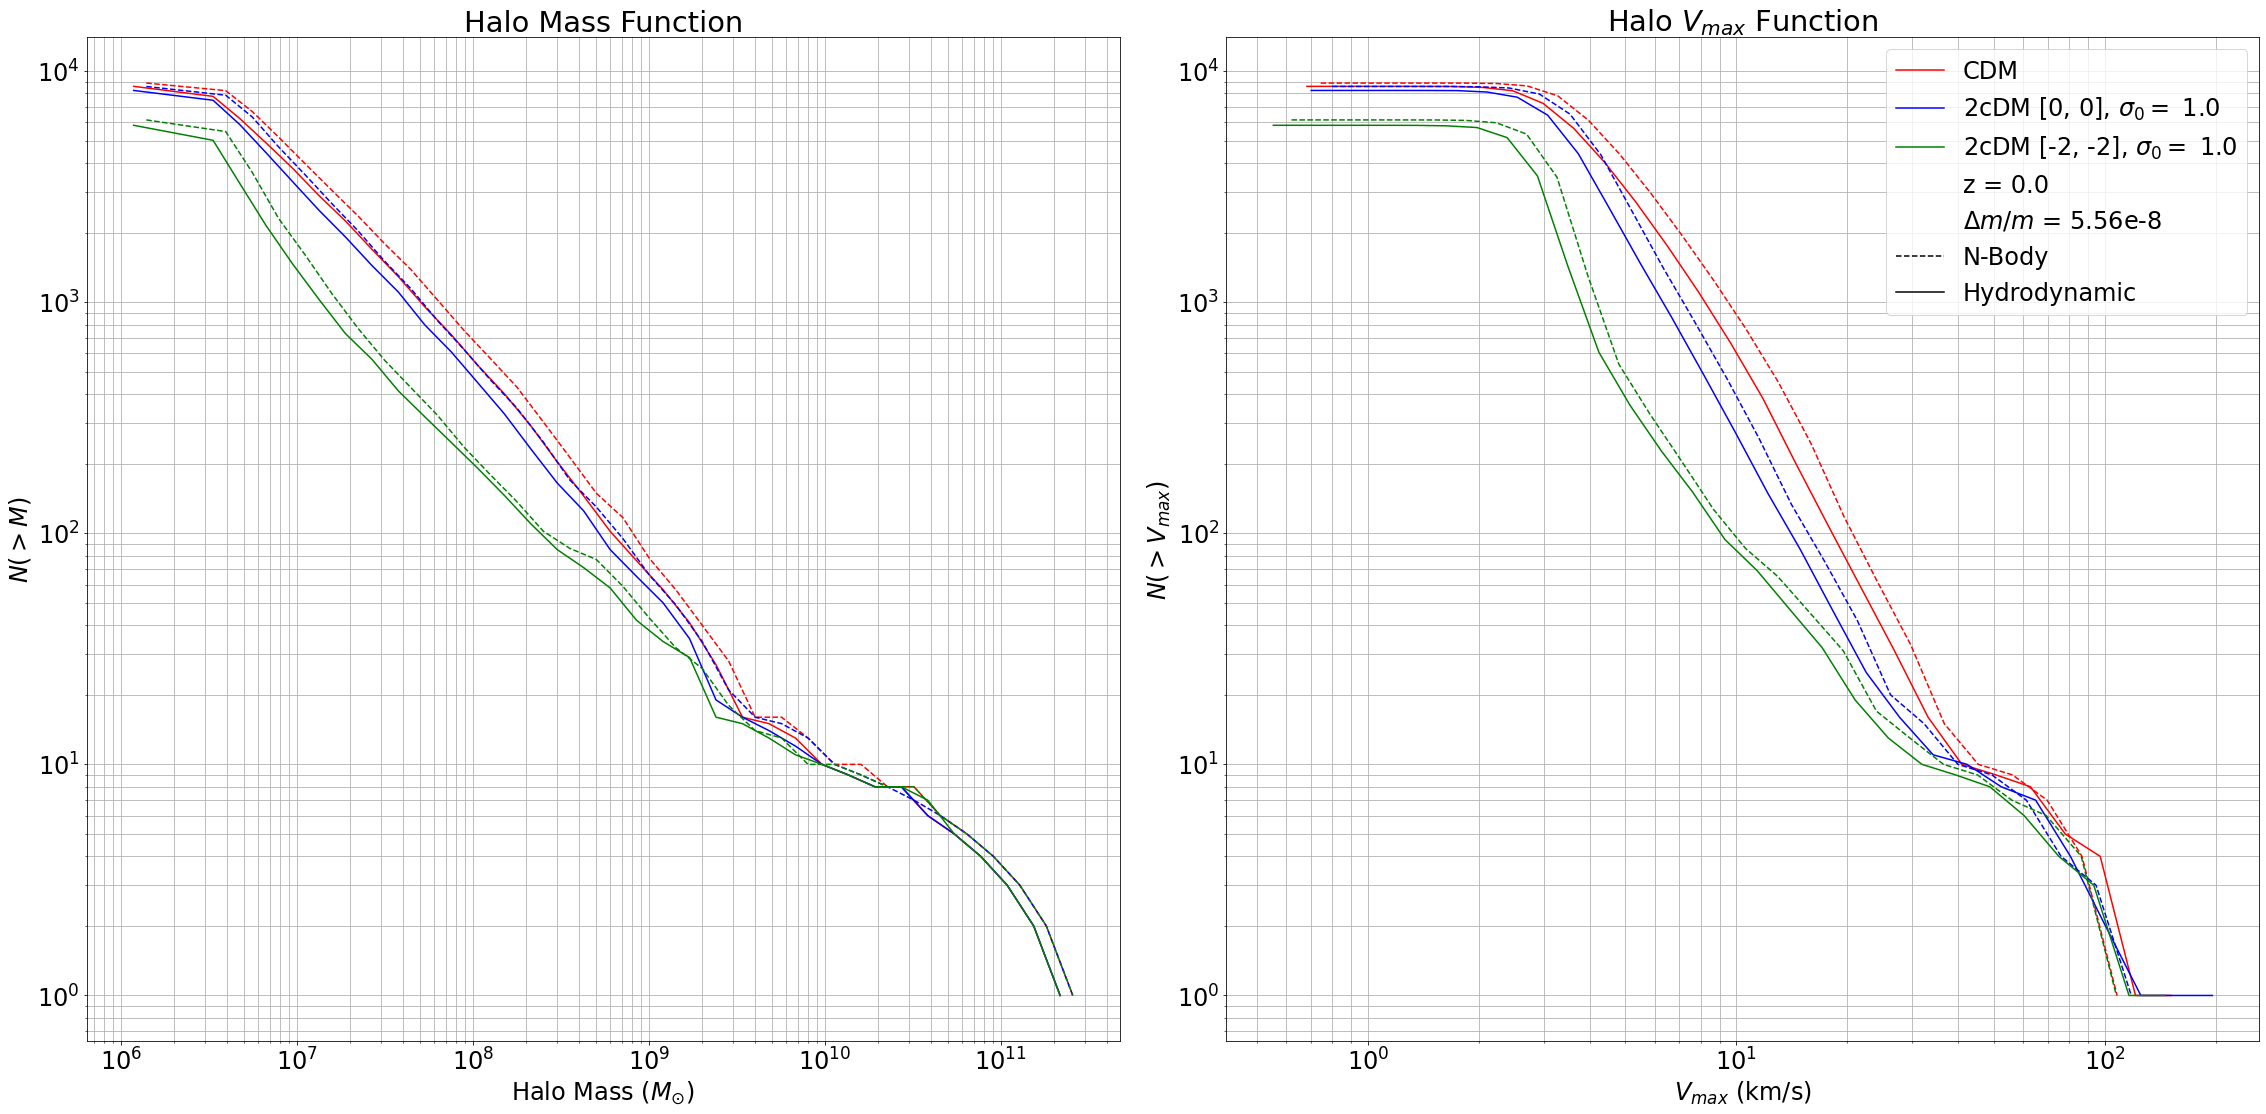

In [46]:
snap_no = 7
runs = [
    'run_CDM_L3N256_DM',
    'run_CDM_L3N256_HY',
    'run_2cDM_L3N256_DM_power00_sigma1',
    'run_2cDM_L3N256_HY_power00_sigma1',
    'run_2cDM_L3N256_DM_powerm2m2_sigma1',
    'run_2cDM_L3N256_HY_powerm2m2_sigma1'
    ]
colors = [
    'r',
    'b',
    'g'
]
fig, ax = plt.subplots(1, 2, figsize=[32,16])

boxsize = 0
redshift = 0
npart = 0

for i, run in enumerate(runs):
    run_info_path = os.path.join(data_base, run, 'run_info.json')
    
    with open(run_info_path) as f:
        run_info = json.load(f)

    redshift = run_info['redshifts'][snap_no]
    boxsize = run_info['BoxSize'] / 1000
    npart = run_info['NPart']

    dm_type = run_info['DM type']
    baryon_type = run_info['baryon_type']

    print( f'{run_info["Mass Resolution"]:.2e}', run_info['Softening Length'])

    label = f'{dm_type}'

    if dm_type == '2cDM':
        sigma0 = run_info['sigma0']
        powerLaws = run_info['powerLaws']
        label += f' {powerLaws}, $\sigma_0=$ {sigma0}'

    mbins, m = np.loadtxt( os.path.join(data_base, run, f'mass_profile_{snap_no}.txt') )
    vbins, v = np.loadtxt( os.path.join(data_base, run, f'vel_profile_{snap_no}.txt') )
    if baryon_type == 'DM':
        ax[0].plot(mbins, m, '--', color=colors[i//2])
        ax[1].plot(vbins, v, '--', color=colors[i//2])
    else:
        ax[0].plot(mbins, m, label=label, color=colors[i//2])
        ax[1].plot(vbins, v, label=label, color=colors[i//2])

ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(redshift), alpha=0)
ax[1].plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax[1].plot([],[], '--', label='N-Body', color='k')
ax[1].plot([],[], label='Hydrodynamic', color='k')

ax[1].set_xlabel("$V_{max}$ (km/s)")
ax[1].set_ylabel("$N\\left(>V_{max}\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()

plt.savefig(outpath + 'L3N256_both_profiles.png')
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


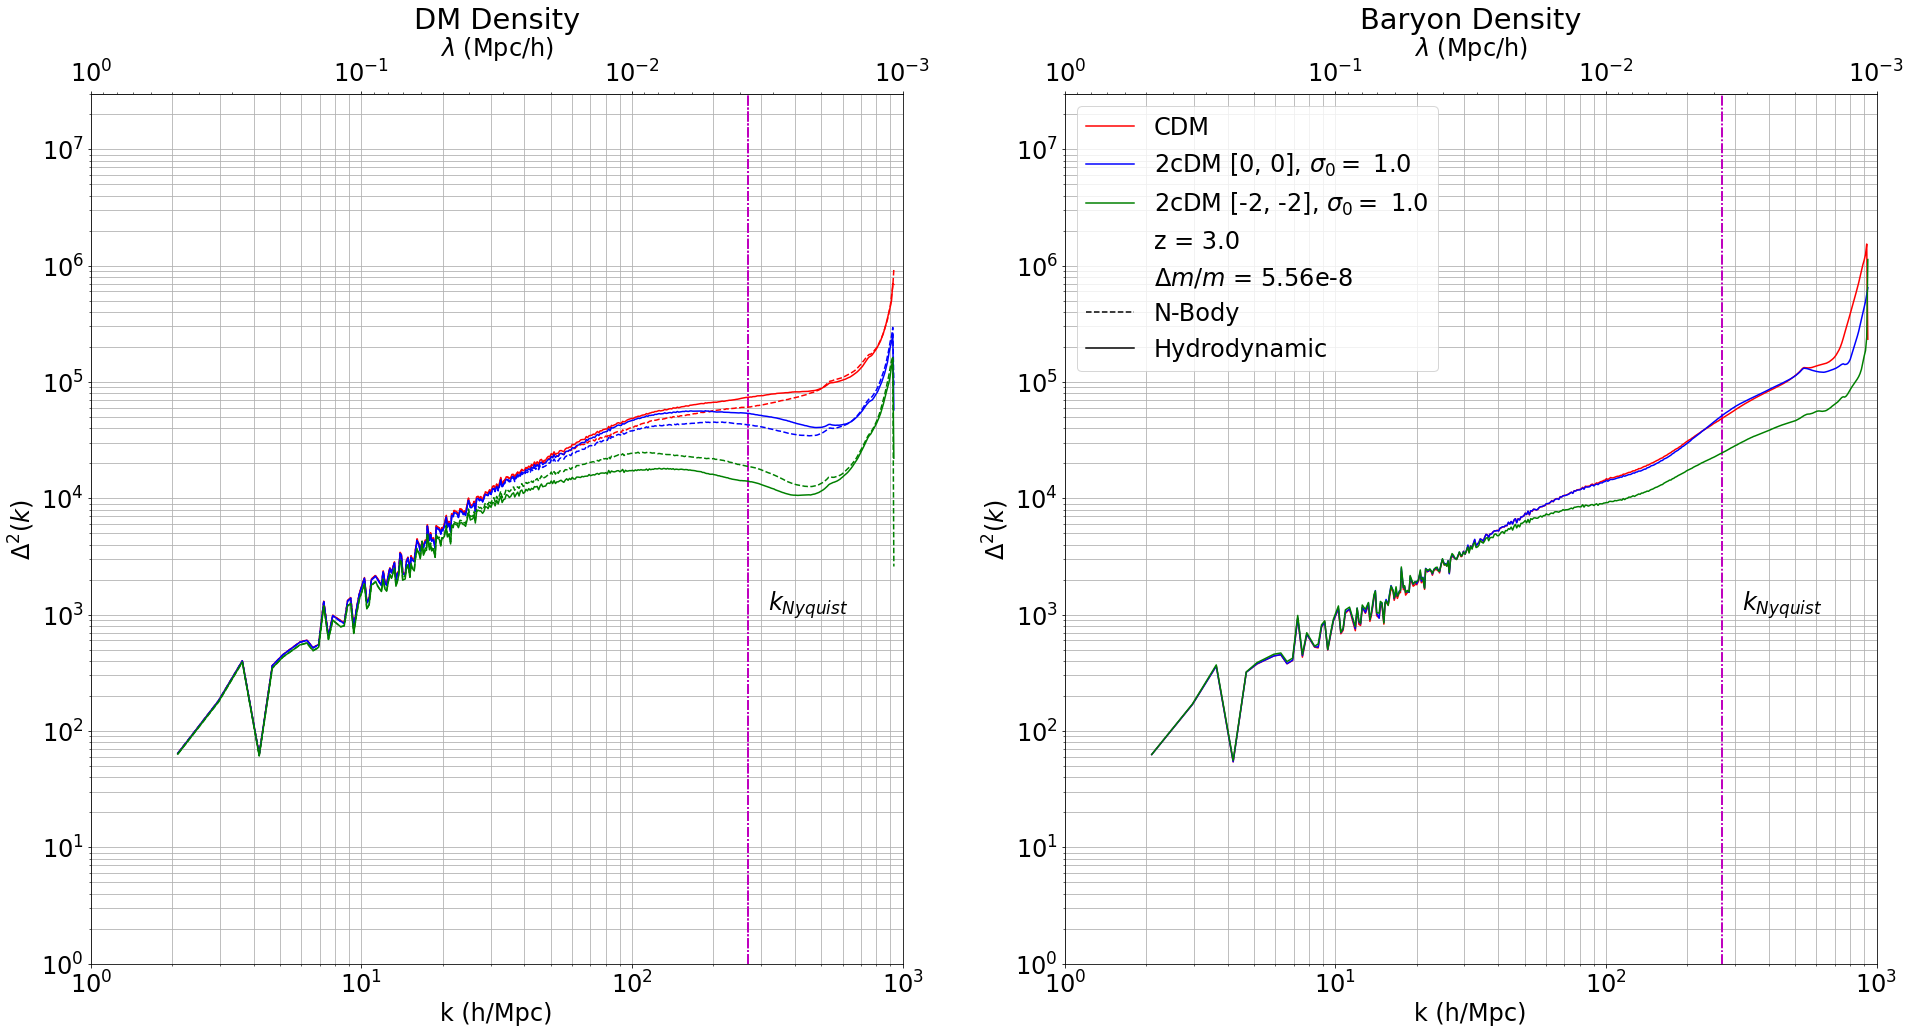

In [87]:
snap_no = 4
runs = [
    'run_CDM_L3N256_DM',
    'run_CDM_L3N256_HY',
    'run_2cDM_L3N256_DM_power00_sigma1',
    'run_2cDM_L3N256_HY_power00_sigma1',
    'run_2cDM_L3N256_DM_powerm2m2_sigma1',
    'run_2cDM_L3N256_HY_powerm2m2_sigma1'
    ]

colors = [
    'r',
    'b',
    'g'
]

fig, ax = plt.subplots(1, 2, figsize=[32,16])

boxsize = 0
redshift = 0
npart = 0

for i, run in enumerate(runs):

    run_info_path = os.path.join(data_base, run, 'run_info.json')
    
    with open(run_info_path) as f:
        run_info = json.load(f)

    redshift = run_info['redshifts'][snap_no]
    boxsize = run_info['BoxSize'] / 1000
    npart = run_info['NPart']

    dm_type = run_info['DM type']
    baryon_type = run_info['baryon_type']

    label = f'{dm_type}'

    if dm_type == '2cDM':
        sigma0 = run_info['sigma0']
        powerLaws = run_info['powerLaws']
        label += f' {powerLaws}, $\sigma_0=$ {sigma0}'

    bins, pk, dk, k_ny = load_ps_data(run, snap_no)

    if baryon_type == 'DM':
        ax[0].plot(bins, dk, '--', color=colors[i//2])
    else:
        ax[0].plot(bins, dk, label=label, color=colors[i//2])

    ax[0].vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')

    if baryon_type == 'DM':
        continue
    
    bins, pk, dk, k_ny = load_ps_data(run, snap_no, dm_type='by')
    
    ax[1].plot(bins, dk, label=label, color=colors[i//2])
    ax[1].vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')


ax[0].text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')
ax[1].text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')

for a in ax:
    a.set_xlabel('k (h/Mpc)')
    a.set_ylabel('$\Delta^{2}(k)$')
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_xlim(10**0, 10**3)
    a.set_ylim(10**0, 10**7 + 2*10**7)
    sax = a.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
    sax.set_xlabel('$\lambda$ (Mpc/h)')
    a.grid(True, which="both", ls="-")

ax[1].plot([],[], label='z = {}'.format(redshift), alpha=0)
ax[1].plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax[1].plot([],[], '--', label='N-Body', color='k')
ax[1].plot([],[], label='Hydrodynamic', color='k')

ax[0].set_title('DM Density')
ax[1].set_title('Baryon Density')

ax[1].legend()

fname = f'z_{redshift}_Spectra_256.png'
plt.savefig(outpath+fname, dpi=150)
plt.show()

/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


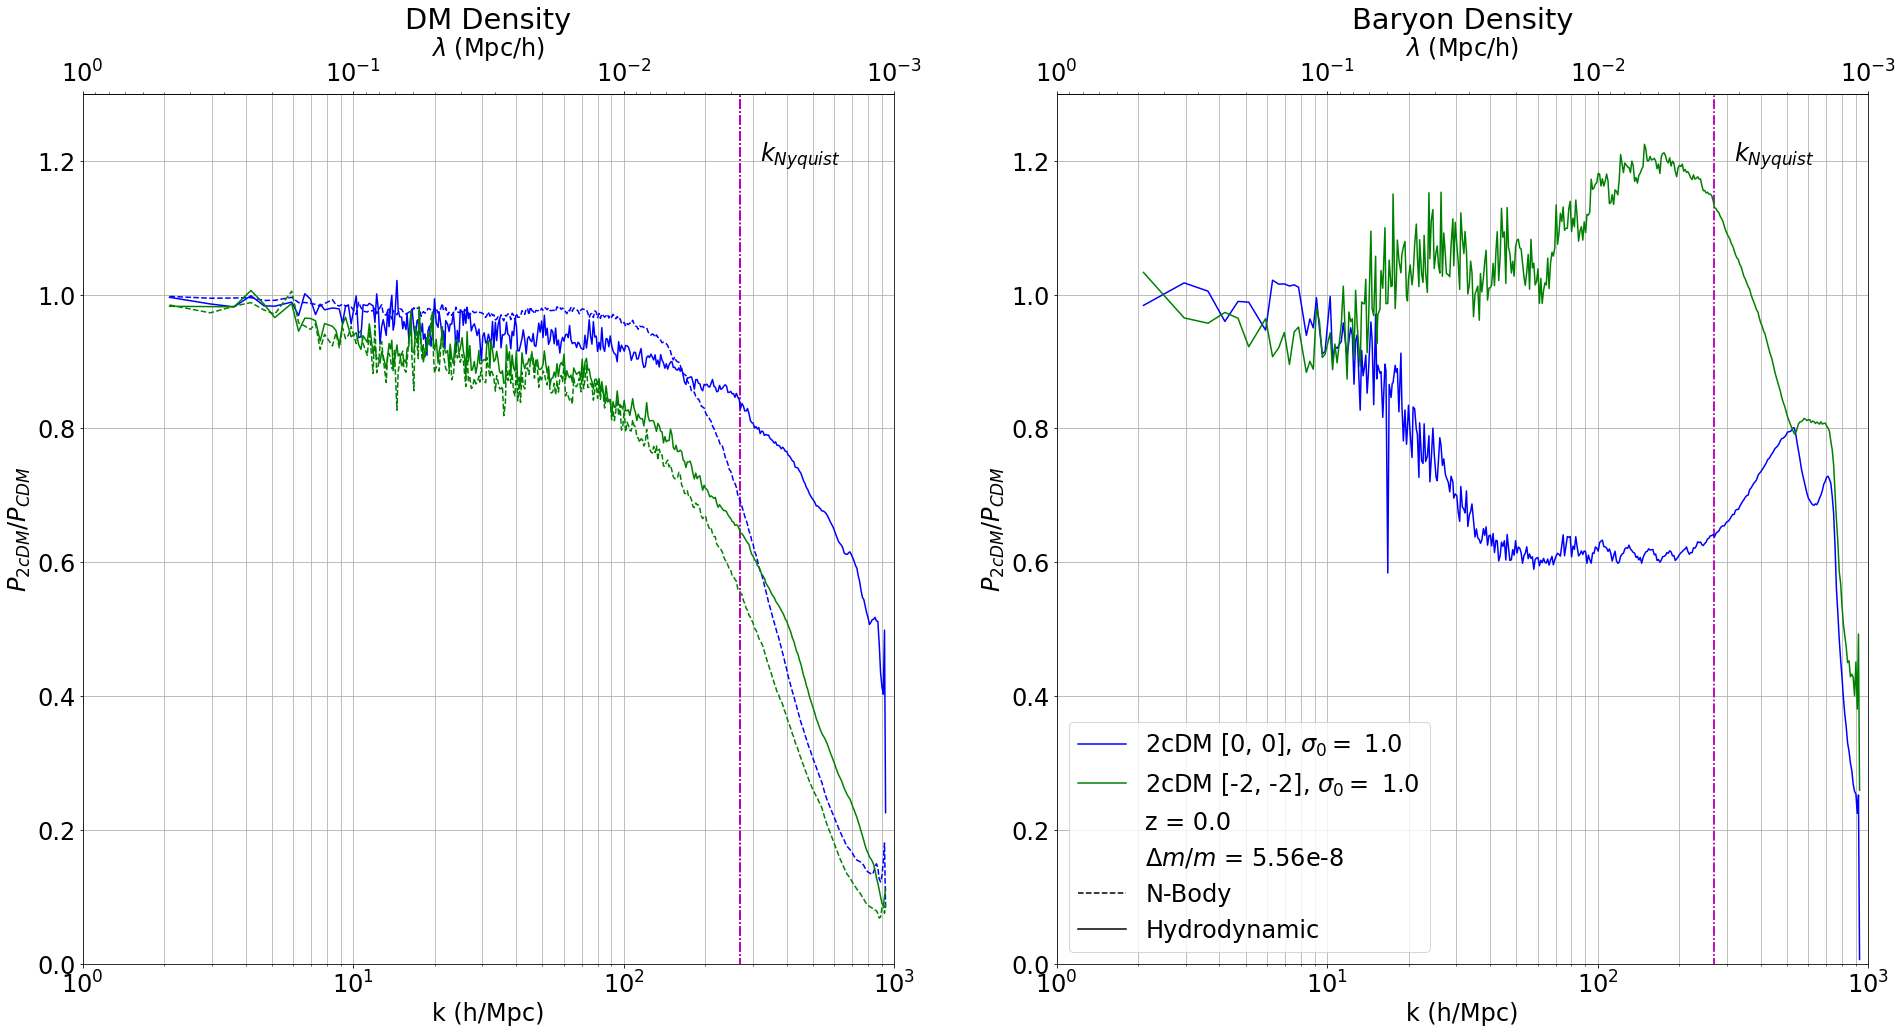

In [86]:
snap_no = 7
CDM_runs = [
    'run_CDM_L3N256_DM',
    'run_CDM_L3N256_HY'
    ]
tcDM_runs = [
    'run_2cDM_L3N256_DM_power00_sigma1',
    'run_2cDM_L3N256_HY_power00_sigma1',
    'run_2cDM_L3N256_DM_powerm2m2_sigma1',
    'run_2cDM_L3N256_HY_powerm2m2_sigma1'
]
colors = [
    'b',
    'g'
]

fig, ax = plt.subplots(1, 2, figsize=[32,16])

boxsize = 0
redshift = 0
npart = 0

for i, run in enumerate(tcDM_runs):
    run_info_path = os.path.join(data_base, run, 'run_info.json')
    
    with open(run_info_path) as f:
        run_info = json.load(f)

    redshift = run_info['redshifts'][snap_no]
    boxsize = run_info['BoxSize'] / 1000
    npart = run_info['NPart']

    dm_type = run_info['DM type']
    baryon_type = run_info['baryon_type']

    label = f'{dm_type}'

    if dm_type == '2cDM':
        sigma0 = run_info['sigma0']
        powerLaws = run_info['powerLaws']
        label += f' {powerLaws}, $\sigma_0=$ {sigma0}'

    bins, pk, dk, k_ny = load_ps_data(run, snap_no)
    if baryon_type == 'DM':
        cbins, cpk, cdk, ck_ny = load_ps_data(CDM_runs[0], snap_no)

        ax[0].plot(bins, pk/cpk, '--', color=colors[i//2])
    else:
        cbins, cpk, cdk, ck_ny = load_ps_data(CDM_runs[1], snap_no)
        ax[0].plot(bins, pk/cpk, label=label, color=colors[i//2])

    ax[0].vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')

    if baryon_type == 'DM':
        continue
    
    bins, pk, dk, k_ny = load_ps_data(run, snap_no, dm_type='by')
    cbins, cpk, cdk, ck_ny = load_ps_data(CDM_runs[1], snap_no, dm_type='by')
    ax[1].plot(bins, pk/cpk, label=label, color=colors[i//2])
    ax[1].vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')



ax[0].text(k_ny + 0.5*10**2, 1.2, '$k_{Nyquist}$')
ax[1].text(k_ny + 0.5*10**2, 1.2, '$k_{Nyquist}$')

for a in ax:
    a.set_xlabel('k (h/Mpc)')
    a.set_ylabel('$P_{2cDM}/P_{CDM}$')
    a.set_xscale('log')
    a.set_xlim(10**0, 10**3)
    a.set_ylim(0, 1.3)
    sax = a.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
    sax.set_xlabel('$\lambda$ (Mpc/h)')
    a.grid(True, which="both", ls="-")

ax[1].plot([],[], label='z = {}'.format(redshift), alpha=0)
ax[1].plot([],[], label='$\Delta m/m$ = 5.56e-8', alpha=0)
ax[1].plot([],[], '--', label='N-Body', color='k')
ax[1].plot([],[], label='Hydrodynamic', color='k')

ax[0].set_title('DM Density')
ax[1].set_title('Baryon Density')

ax[1].legend()

fname = f'z_{redshift}_ratio_256.png'
plt.savefig(outpath+fname, dpi=150)
plt.show()